![](https://raw.githubusercontent.com/noszitomi/temp_pics/refs/heads/main/qec_banner.png)
# Base functionality
---

#### Library of popular quantum error correction code constructions:
1. general stabilizer codes
2. Calderbank - Steane - Shor (CSS) codes 
3. Hypergraph Prodcut (HGP) codes
4. Surface codes 

#### Tools for the 'fundamental' analysis of the above families:
- physical qubit number
- logical qubit number
- Z and X code distance 
    - exact calculation for smaller codes
    - heuristi method (based on BP-OSD) for large codes 
- Z and X logical operator basis 


> 
> *note*:\
> \
> The deeper you move in the code familiy hierarchy, the more optimal our methods are.\
> E.g.: the distance calucaltion for a HGP code is faster than for a CSS code.
> 

Basic example on the base functionality:

In [1]:
import numpy as np
from qec.code_constructions import CSSCode

hamming_code = np.array([[1, 0, 0, 1, 0, 1, 1],
                         [0, 1, 0, 1, 1, 0, 1],
                         [0, 0, 1, 0, 1, 1, 1]])

steane_code = CSSCode(x_stabilizer_matrix = hamming_code,
                      z_stabilizer_matrix = hamming_code,
                      name = 'Steane')
print(steane_code)

Steane Code: [[N=7, K=1, dx<=None, dz<=None]]


In [8]:
steane_code.compute_exact_code_distance()
print(steane_code)
print('The overall code distance is: ', steane_code.code_distance)
print('The logical operators are: \n',steane_code.logical_operator_basis.toarray())
print('with wieghts: ',steane_code.logical_basis_weights())

Steane Code: [[N=7, K=1, dx<=3, dz<=3]]
The overall code distance is:  3
The logical operators are: 
 [[1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 0 0 0]]
with wieghts:  (array([3]), array([3]))


#### How the base functionality can 'kickstart' a QEC researcher's work:
---

![](https://raw.githubusercontent.com/noszitomi/temp_pics/refs/heads/main/kickstart_scenario.png)

They can already do some quick analysis just by finding the narrowest familiy the construction belongs to!
In the above [paper](https://www.nature.com/articles/s41586-024-07107-7) they introduce the so called Bivariate Bycicle codes, that belong to the CSS code familiy. 
Therefore, they can already use the tools that are available thourgh our CSS class:

In [ ]:
#------------------------------------------------------------------------------
# Code is taken from the Bivariate Bycicle Codes paper:
# https://github.com/sbravyi/BivariateBicycleCodes/blob/main/distance_test.py
#------------------------------------------------------------------------------

# [[144,12,12]]
ell,m = 12,6
a1,a2,a3 = 3,1,2
b1,b2,b3 = 3,1,2

n = 2*ell*m
n2 = ell*m

# define cyclic shift matrices 
I_ell = np.identity(ell,dtype=int)
I_m = np.identity(m,dtype=int)
I = np.identity(ell*m,dtype=int)
x = {}
y = {}
for i in range(ell):
	x[i] = np.kron(np.roll(I_ell,i,axis=1),I_m)
for i in range(m):
	y[i] = np.kron(I_ell,np.roll(I_m,i,axis=1))
A = (x[a1] + y[a2] + y[a3]) % 2
B = (y[b1] + x[b2] + x[b3]) % 2

hx = np.hstack((A,B))
hz = np.hstack((np.transpose(B),np.transpose(A)))

In [4]:
bivariate_bycycle_code = CSSCode(x_stabilizer_matrix = hx,
                                  z_stabilizer_matrix = hz,
                                  name = 'Bivariate Bycycle')

Here we can also showcase our distance, estimation method. First we try to calculate the exact disdtance (we expect this to fail due to the large number of logical qubits k > 10):

In [ ]:
# bivariate_bycycle_code.compute_exact_code_distance() # uncomment to demonstrate crash

: 

Indeed the kernel crashed. It's time to turn to our heuristic method:

In [ ]:
bivariate_bycycle_code.estimate_min_distance()
print(bivariate_bycycle_code)


Estimating distance: dx <= 12, dz <= 12, x-weights: 12.00, z-weights: 16.83: 100%|█████████▉| 0.24921178817749023/0.25 [00:00<00:00,  1.10it/s] 

Bivariate Bycycle Code: [[N=144, K=12, dx<=12, dz<=12]]


Not only did the estimation **returned the optimal distance**, the same value that they give in the paper, it was done **in only 0.25 seconds!**

# Circuit compilation 
---

After obtaining the fundamental properties of a new QEC code, one needs to perform circuit-level noise simulations to analyse its fault-tolerant implementation.

Memory experiments, where a logical state is prepared and maintained through repeated error correction rounds to combat decoherence and gate errors that occur over time in real quantum hardware, are the easiest to simulate while providing this insight.

To create such an experiment we rely on the information that can be obtained using the **base functionality** of our package. By accessing the stabilizers and the logical operators of the code we can construct the required circuit:

example Hypergraphproduct Code: [[N=13, K=1, dx=None, dz=None]]


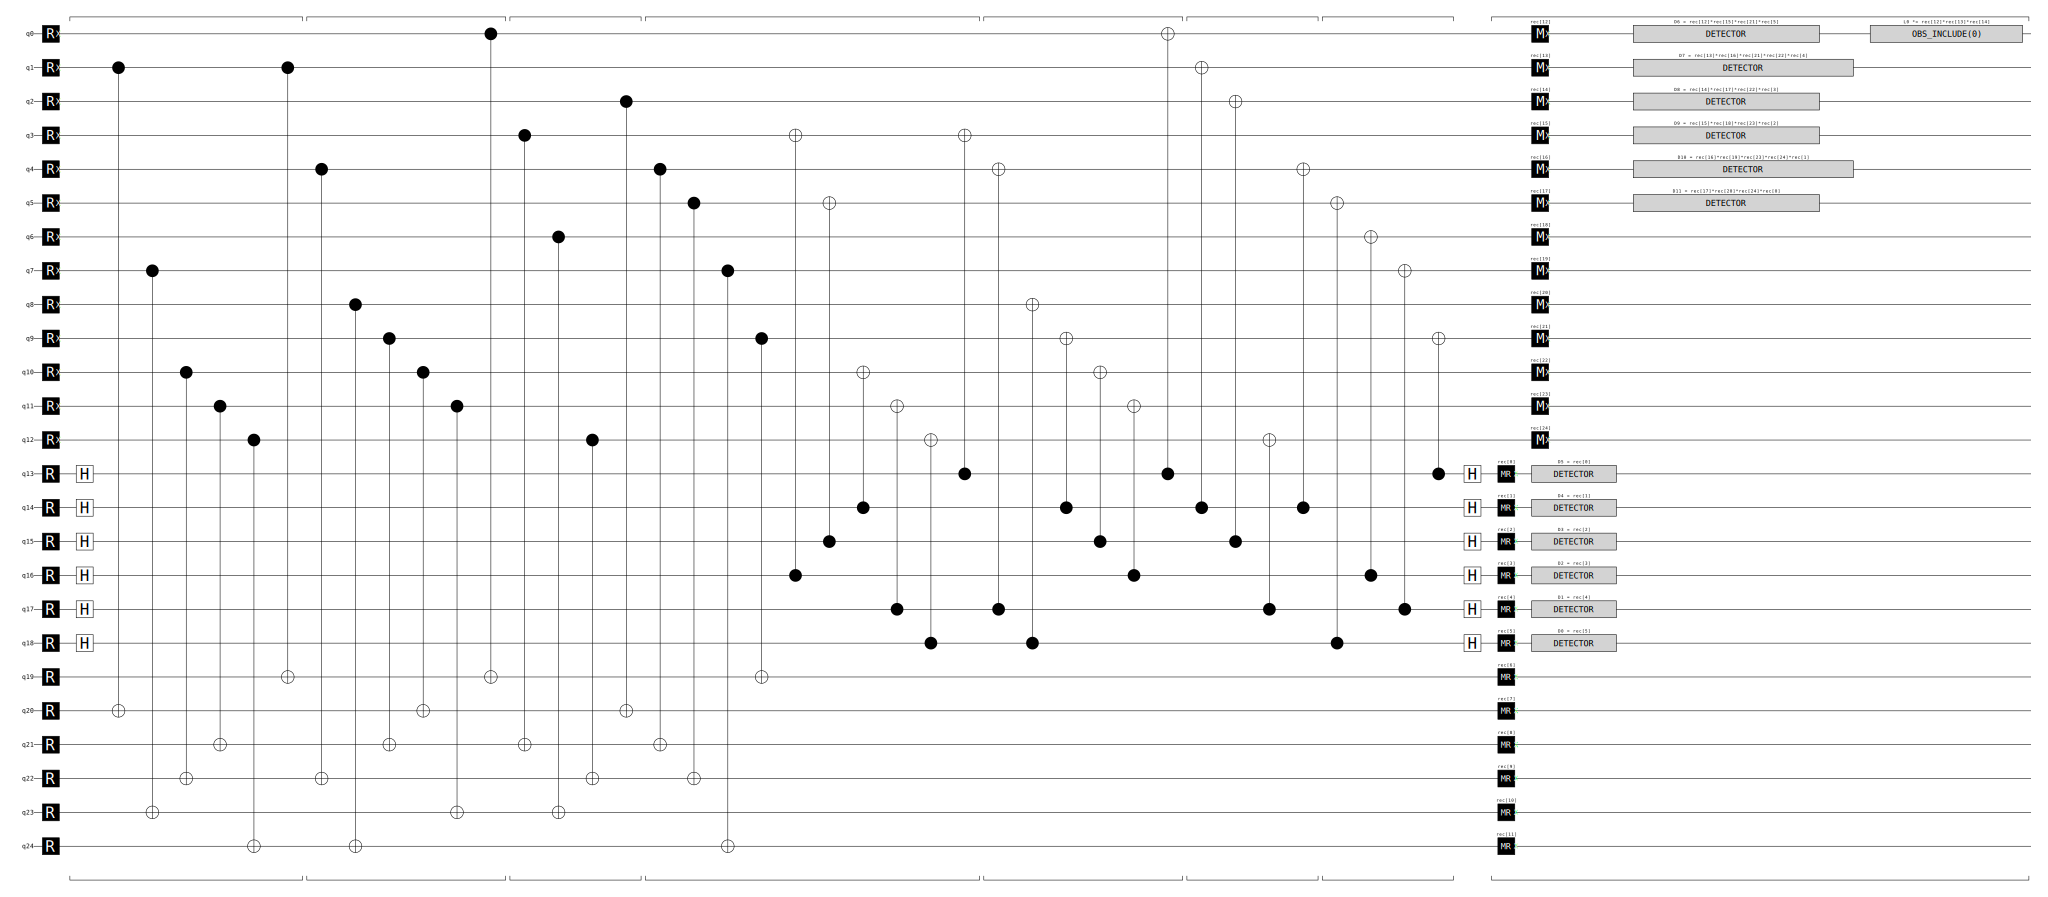

In [9]:
from qec.circuit_compilation import MemoryExperiment
from qec.code_constructions import HypergraphProductCode

three_repetition_code = np.array([[1, 1, 0],
                                  [0, 1, 1]])

example_code = HypergraphProductCode(three_repetition_code, three_repetition_code, name = 'example')
print(example_code)

hgp_memory = MemoryExperiment(example_code)
circuit = hgp_memory._coloration_circuit(basis = 'X', rounds = 1, noise = False)
circuit.diagram('timeline-svg')

---

For preview: `pip install qec`

*Authors: Joschka Roffe, Tamas Noszko, Liam Veeder-Sweeny*

